# Notebook sobre caminata aleatoria
## Óscar Anuar Alvarado Morán

##  A priori escogí el problema de la caminata aleatoria, es decir, el segundo problema. Sin embargo, al llegar a la parte de aplicarlo sobre un problema de física no encontré mucha literatura e intenté hacer el primer problema con lo que ya sabía del segundo problema.

In [1]:
using Plots

In [2]:
using Distributions

In [3]:
gr()

Plots.GRBackend()

In [14]:
pyplot()

Plots.PyPlotBackend()

In [4]:
using LsqFit

## Caminantes aleatorios

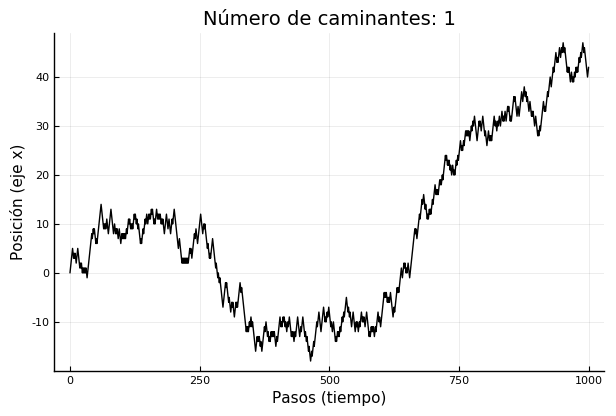

In [96]:
A = []
caminantes = 1:1
pasos = 0:1000

for j in caminantes
    n = 0
    posicion = []
    for i in pasos
        x = randn()
        push!(posicion,n)
        if (x < 0)
            n += 1
        else
            n -= 1
        end
    end
    push!(A,posicion)
end
A
p1 = plot(pasos,A[:],
    xlabel = "Pasos (tiempo)",
    ylabel = "Posición (eje x)",
    title = "Número de caminantes: $(length(caminantes))",
    leg = false,
    lw = 1,
    lc = :black)
savefig(p1,"Caminante.png")

Parece haber una buena distribución aquí, se ve como gaussiana.

## Promedio

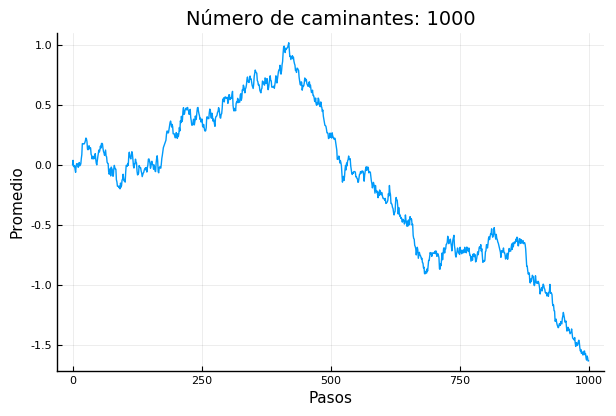

In [25]:
#⟨x⟩
promedio_posicion = sum(A[:]) / length(caminantes)

p2 = plot(pasos, promedio_posicion, 
    leg = false,
    xlabel = "Pasos",
    title = "Número de caminantes: $(length(caminantes))",
    ylabel = "Promedio")

savefig(p2, "promedio.png")

No parece decirnos nada el promedio, veamos con la varianza.

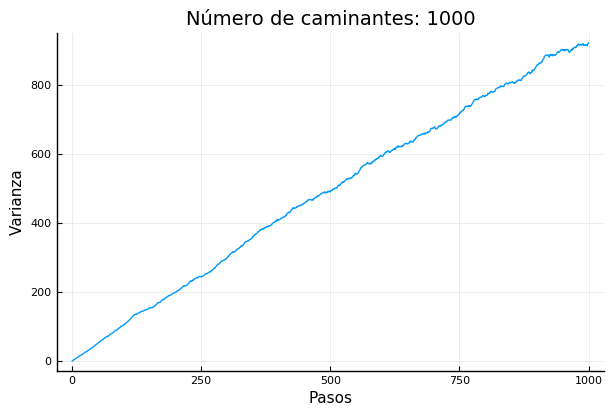

In [28]:
cuadrado = []
for l in caminantes
    push!(cuadrado,A[l] .^ 2)
end
#⟨x^{2}⟩
promedio_de_cuadrado = sum(cuadrado[:]) / length(caminantes)

#⟨x⟩^2
cuadrado_de_promedio = promedio_posicion .^ 2

# Var(x) = ⟨x^{2}⟩ - ⟨x⟩^2
varianza = promedio_de_cuadrado .- cuadrado_de_promedio
p3 = plot(pasos, varianza, 
    leg = false,
    xlabel = "Pasos",
    title = "Número de caminantes: $(length(caminantes))",
    ylabel = "Varianza")
savefig(p3, "varianza.png")

¡Varianza lineal!

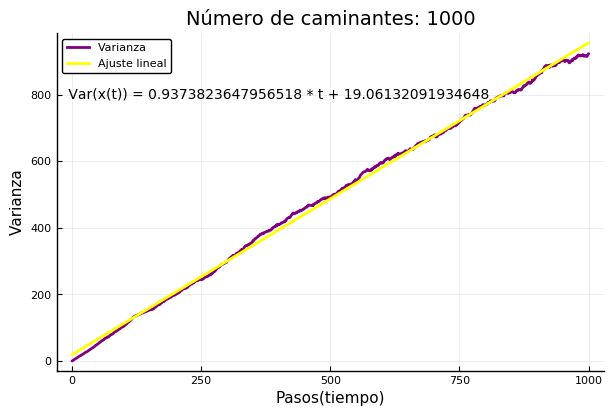

In [62]:
Modelo(x,p) = p[1].*x.+p[2]
x = pasos
y = varianza
p0 = [0.0, 0.0]

Ajuste = curve_fit(Modelo, x, y, p0)

Y = Ajuste.param

p4 = plot(x,y, label = "Varianza", lw = 2, lc = :purple)
plot!(x,Modelo(x,Y), label = "Ajuste lineal", lc = :yellow, lw = 2, 
    ylabel = "Varianza", xlabel = "Pasos(tiempo)", 
    title = "Número de caminantes: $(length(caminantes))")
annotate!([(400,800,text(" Var(x(t)) = $(Y[1]) * t + $(Y[2]) ",10,:black,:center))])

savefig(p4, "Ajuste_lineal.png")

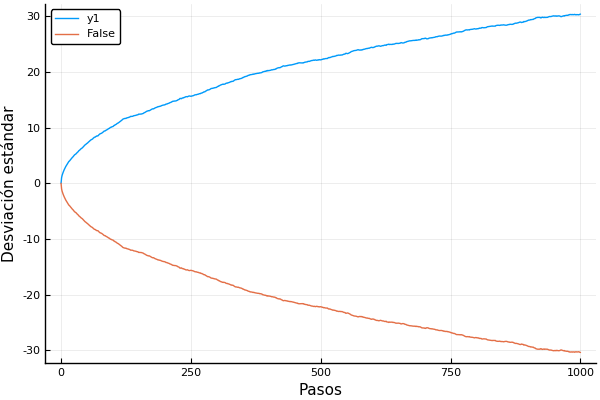

In [77]:
desviacon_estandar1 = .√(varianza)
desviacon_estandar2 = (.√(varianza)) .* (-1)
p4 = plot(pasos, desviacon_estandar1,
    xlabel = "Pasos",
    ylabel = "Desviación estándar")
plot!(pasos, desviacon_estandar2, label = false)

Una varianza lineal nos da una desviación estándar como raiz.

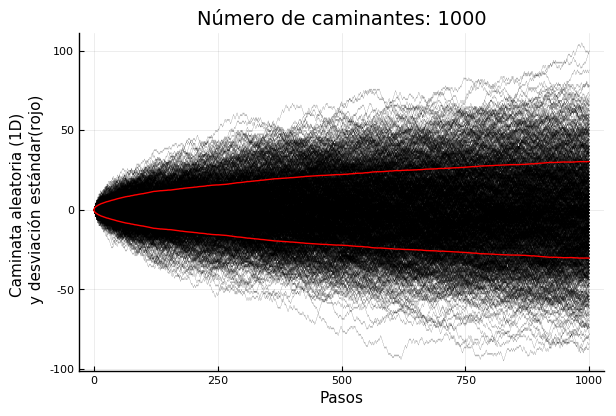

In [78]:
p5 = plot(pasos,A[:], lc = :black, leg = false, lw = 0.1,
    xlabel = "Pasos",
    ylabel = "Caminata aleatoria (1D) \n y desviación estándar(rojo)",
    title = "Número de caminantes: $(length(caminantes))")
plot!(pasos, desviacon_estandar1, lc = :red, label = "Desviación estándar")
plot!(pasos, desviacon_estandar2, lc = :red)
savefig(p5, "Desviacion.png")

Vi que la forma de ésto tiene que ver con el coeficiente de difusión, ya que la varianza es lineal, el coeficiente de difusión es lineal con el tiempo según vi en la literatura.

## Aplicación a la física.

Constantes

In [79]:
KB = 1.3806488*10^(23)
T = 300
γ = 2*10^(-8)
r = 10^(-6)
F_0 = KB*T/r
a = sqrt((2*KB*T/γ))

9.110150347939139e13

La ecuación con sobreamortiguamiento de Langevin viene dada por:
$$
0 = -\nabla U(x) - \gamma \dot{x} + \sqrt{2\gamma k_{B}T}R(t)
$$
para el caso en que $U(x) = 0$ tenemos la ecuación 
$$
\gamma \dot{x} = \sqrt{2\gamma k_{B}T}R(t)
$$
$$
\Rightarrow \dot{x} = \sqrt{\frac{2 k_{B}T}{\gamma}}R(t)
$$

Resolveremos con el método de Euler:

In [83]:
function metodo_Euler(f,t0,tf,x0,N)
    x = [float(x0)]
    t = [float(t0)]
    h = (tf-t0)/N
    X = x0
    
    for i in 1:N
        X = X + h*f(x[i],t[i])
        push!(x,X)
        push!(t,t0+i*h)
    end
    return x,t  
end

metodo_Euler (generic function with 1 method)

## Un caminante aleatorio $(U(x) = 0)$

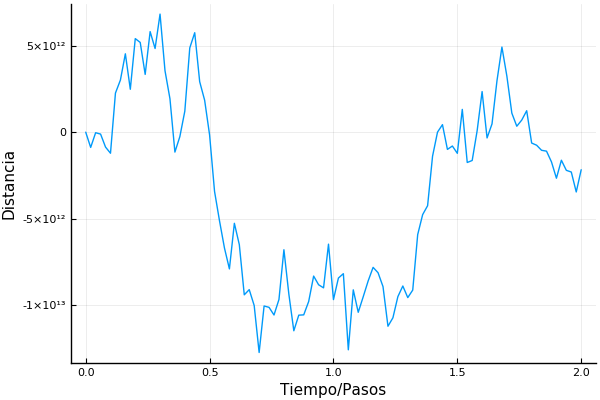

In [84]:
pasos = 100
d = Normal(0,1)
R(x,t) = a.*rand(d) #Esta es mi función sqrt(2k_{B}T(Δt)/γ)W(t), 
                            #donde W(t) es un proceso de Wiener que podemos simular con valores de euna distribución normal
B = metodo_Euler(R,0,2,r,pasos) 
plot(B[2],B[1], xlabel = "Tiempo/Pasos", ylabel = "Distancia", leg = false)

Vemos que tenemos como resultado un caminante aleatorio al parecer, habría que checar su varianza.

## Varios caminantes aleatorios (U(x) = 0)

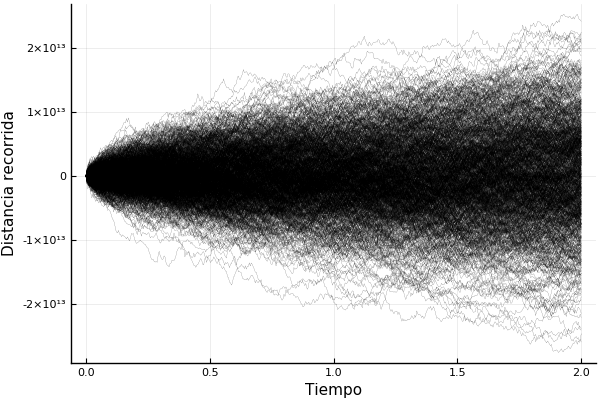

In [82]:
caminantes = 1000
pasos = 500
Coleccion = []
tiempo = []
for i in 1:caminantes
    B = []
    Gaussiana = Normal(0,1)
    R(x,t) = a.*rand(Gaussiana)
    B = metodo_Euler(R, 0, 2, r, pasos)
    push!(Coleccion, B[1])
    push!(tiempo, B[2])
end
C = Coleccion
D = tiempo
plot(D[:], C[:], lc = :black,leg = false, lw = 0.1, xlabel = "Tiempo", ylabel = "Distancia recorrida")

para el caso en que $U(x) = F_{0}|x|$ tenemos la ecuación 
$$
\gamma \dot{x} = \sqrt{2\gamma k_{B}T}R(t) -F_{0}\nabla(|x|)
$$

$$
\Rightarrow \dot{x} = \sqrt{\frac{2 k_{B}T}{\gamma}}R(t) - \frac{F_{0}}{\gamma}\nabla(|x|)
$$
es decir, si $x < 0$ entonces tenemos 

$$
\dot{x} = \sqrt{\frac{2 k_{B}T}{\gamma}}R(t) + \frac{F_{0}}{\gamma}
$$
y si $x \geq 0$ tenemos
$$
\dot{x} = \sqrt{\frac{2 k_{B}T}{\gamma}}R(t) - \frac{F_{0}}{\gamma}
$$

Tenemos que hacerle una modificación a nuestro método de Euler ya que aquí le podemos insertar la condición del signo de la fuerza.

In [85]:
function metodo_Euler_Langevin(f,t0,tf,x0,N)
    x = [float(x0)]
    t = [float(t0)]
    h = (tf-t0)/N
    X = x0
    
    if x[end] < 0 
        signo = 1
    else
        signo = -1
    end
    
    for i in 1:N
        X = X + h*(f(x[i],t[i]) + signo*F_0/γ)
        push!(x,X)
        push!(t,t0+i*h)
    end
    return x,t  
end

metodo_Euler_Langevin (generic function with 1 method)

## Un caminante aleatorio $(U(x) = F_{0}|x|)$

In [86]:
pasos = 100
d = Normal(0,1)
Y(x,t) = sqrt(t)*a.*rand(d) #Esta es mi función sqrt(2k_{B}T(Δt)/γ)W(t) -F_{0}∇|x|, 
                            #donde W(t) es un proceso de Wiener que podemos simular con valores de una distribución normal
F = [0 10e2 10e3 10e5]
label = ["F_0 = 0" "F_0 = 10e2" "F_0 = 10e3" "F_0 = 10e5"]
plot(0,0)
for i in 1:length(F)
    F_0 = F[i]
    B = metodo_Euler_Langevin(Y,0,2,r,pasos) 
    plot!(B[2],B[1], xlabel = "Tiempo/Pasos", ylabel = "Distancia", label = label[i], show = :ijulia)
end

ErrorException: cannot define function Y; it already has a value

## Varios caminantes aleatorios $(U(x) = F_{0}|x|)$

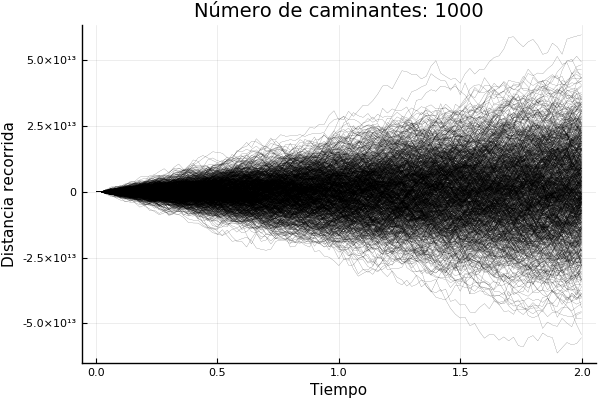

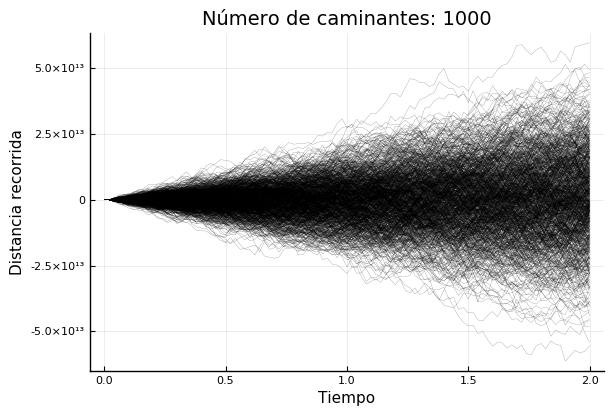

In [95]:
caminantes = 1000
pasos = 100
Coleccion = []
tiempo = []

F = [0]
p6 = plot(0,0)
for j in 1:length(F)
    F_0 = F[j]
    for i in 1:caminantes
        B = []
        d = Normal(0,1)
    
        K(x,t) = (√(t))*a.*rand(d) #Esta es mi función sqrt(2k_{B}T(Δt)/γ)W(t) -F_{0}∇|x|, 
                            #donde W(t) es un proceso de Wiener que podemos simular con valores de una distribución normal
        B = metodo_Euler_Langevin(K,0,2,r,pasos)
        push!(Coleccion, B[1])
        push!(tiempo, B[2])
    end

    C = Coleccion
    D = tiempo
    plot!(D[:], C[:], lc = :black,leg = false, lw = 0.1, xlabel = "Tiempo", ylabel = "Distancia recorrida",
        show = :ijulia, title = "Número de caminantes: $(caminantes)")
end
savefig(p6, "Langevin3.png")

Observamos que para $F_{0} << \frac{K_{B}T}{r}$ tenemos el caso del caminante aleatorio, y para cuando crece esta cantidad se va desviando dependiendo de la posición inicial de la partícula, pero los cambios son apreciables hasta $F_{0}$ mayores a $10^{4}$. 
El factor de la raiz de t en las funciones K y Y, según lo consultado con el profesor sevilla sale de tomar procesos de Weiner, cosa que no me quedó muy clara. Dicho factor sólo hace que la caminata aleatoria ya no se vea como una distribución Gaussiana sino como algo más picudo. Sin embargo a continuación se muestran las gráficas sin este factor.

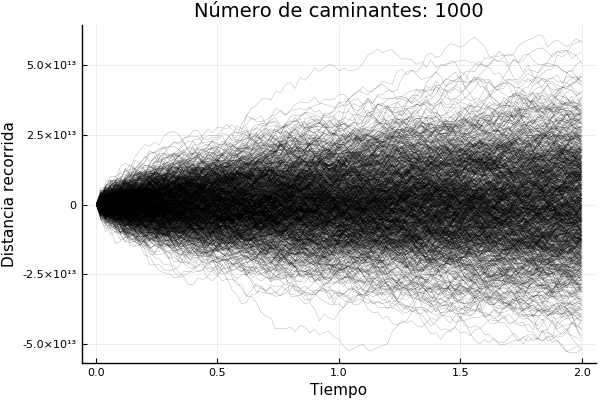

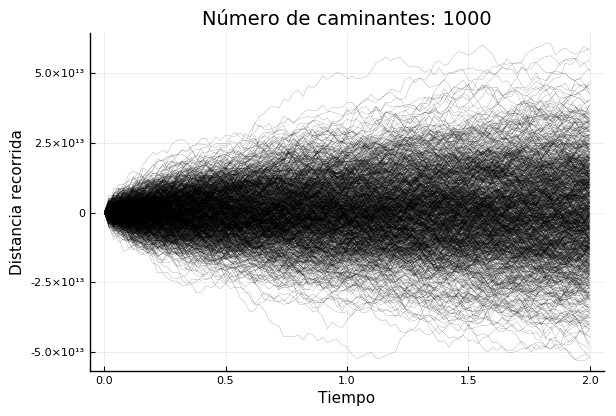

In [94]:
caminantes = 1000
pasos = 100
Coleccion = []
tiempo = []

F = [0]
p8 = plot(0,0)
for j in 1:length(F)
    F_0 = F[j]
    for i in 1:caminantes
        B = []
        d = Normal(0,1)
    
        K(x,t) = a.*rand(d) #Esta es mi función sqrt(2k_{B}T(Δt)/γ)W(t) -F_{0}∇|x|, 
                            #donde W(t) es un proceso de Wiener que podemos simular con valores de una distribución normal
        B = metodo_Euler_Langevin(K,0,2,r,pasos)
        push!(Coleccion, B[1])
        push!(tiempo, B[2])
    end

    C = Coleccion
    D = tiempo
    plot!(D[:], C[:], lc = :black,leg = false, lw = 0.1, xlabel = "Tiempo", ylabel = "Distancia recorrida", show = :ijulia,
    title = "Número de caminantes: $(caminantes)")
end

savefig(p8, "Langevin4.png")

Vemos evidentemente que el efecto del potencial es desviar la trayectoria de las partículas/caminantes.

## (a) El desplazamiento cuadrático medio de x.
Lo calculamos como $\langle x^{2} \rangle - \langle x \rangle^{2} $.
Donde ya aprendimos a calcularlo en la primer sección del notebook.
## 1.- $F_{0} << \frac{K_{B}T}{r}$

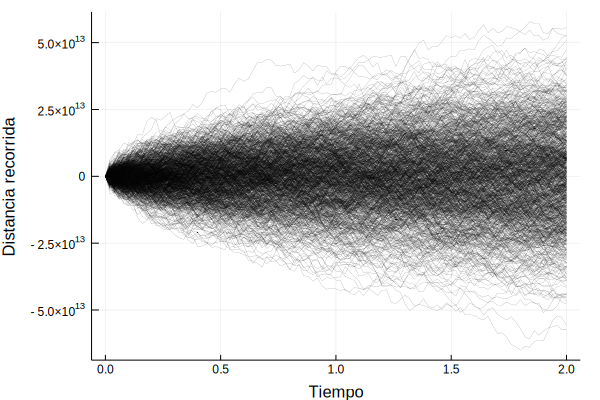

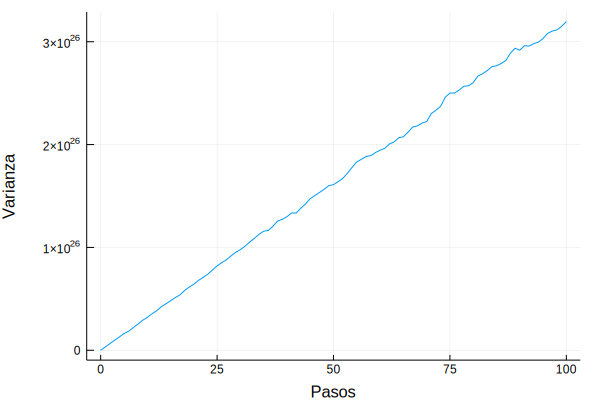

In [19]:
F_0 = 0
caminantes = 1000
pasos = 100
Coleccion = []
tiempo = []
F_0 = 1
for i in 1:caminantes
    B = []
    d = Normal(0,1)

    K(x,t) = a.*rand(d) #Esta es mi función sqrt(2k_{B}T(Δt)/γ)W(t) -F_{0}∇|x|, 
                        #donde W(t) es un proceso de Wiener que podemos simular con valores de una distribución normal
    B = metodo_Euler_Langevin(K,0,2,r,pasos)
    push!(Coleccion, B[1])
    push!(tiempo, B[2])
end

C = Coleccion
D = tiempo
plot(D[:], C[:], lc = :black,leg = false, lw = 0.1, xlabel = "Tiempo", ylabel = "Distancia recorrida", show = :ijulia)

cuadrado = []
for l in 1:caminantes
    push!(cuadrado,(C[l]) .^ 2)
end
#⟨x^2⟩
promedio_de_cuadrado = sum(cuadrado[:]) / length(tiempo)
#⟨x⟩
promedio_posicion = sum(C[:]) / length(tiempo)
#⟨x⟩^2

cuadrado_de_promedio = promedio_posicion .^ 2

#Var(x) = ⟨x^2⟩ - ⟨x⟩^2
varianza = promedio_de_cuadrado .- cuadrado_de_promedio
plot(0:pasos, varianza,    leg = false, xlabel = "Pasos", ylabel = "Varianza")



## 2.- $F_{0} < \frac{K_{B}T}{r}$ 
digamos, $F_{0} = 10^{4}$

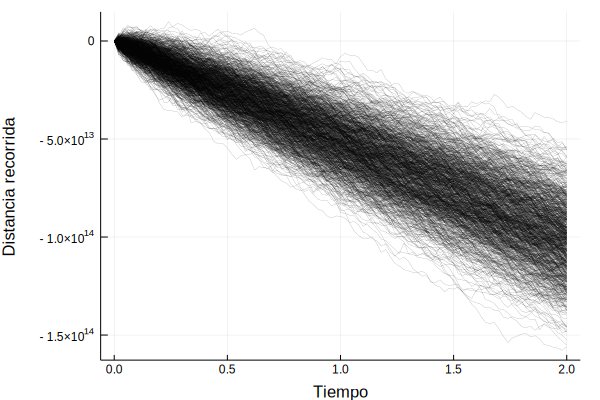

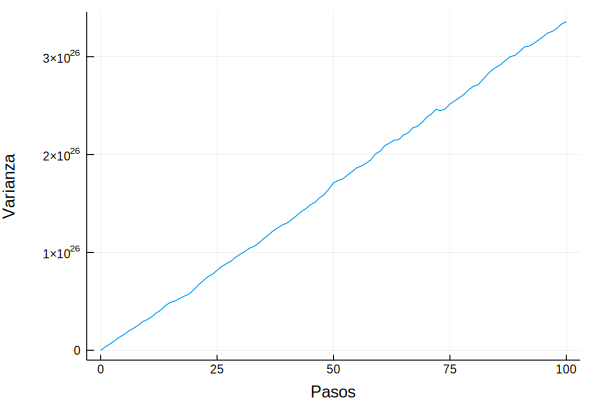

In [20]:
F_0 = 10^6
caminantes = 1000
pasos = 100
Coleccion = []
tiempo = []
for i in 1:caminantes
    B = []
    d = Normal(0,1)

    K(x,t) = a.*rand(d) #Esta es mi función sqrt(2k_{B}T(Δt)/γ)W(t) -F_{0}∇|x|, 
                        #donde W(t) es un proceso de Wiener que podemos simular con valores de una distribución normal
    B = metodo_Euler_Langevin(K,0,2,r,pasos)
    push!(Coleccion, B[1])
    push!(tiempo, B[2])
end

C = Coleccion
D = tiempo
plot(D[:], C[:], lc = :black,leg = false, lw = 0.1, xlabel = "Tiempo", ylabel = "Distancia recorrida", show = :ijulia)

cuadrado = []
for l in 1:caminantes
    push!(cuadrado,(C[l]) .^ 2)
end
#⟨x^2⟩
promedio_de_cuadrado = sum(cuadrado[:]) / length(tiempo)
#⟨x⟩
promedio_posicion = sum(C[:]) / length(tiempo)
#⟨x⟩^2

cuadrado_de_promedio = promedio_posicion .^ 2

#Var(x) = ⟨x^2⟩ - ⟨x⟩^2
varianza = promedio_de_cuadrado .- cuadrado_de_promedio
plot(0:pasos, varianza,    leg = false, xlabel = "Pasos", ylabel = "Varianza")

## 3 .- digamos $F_{0} = 10^{12}$

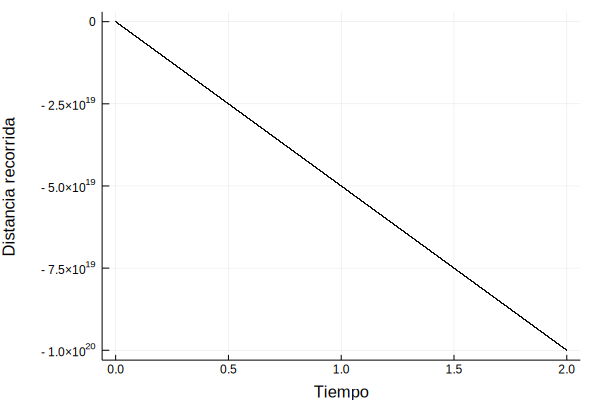

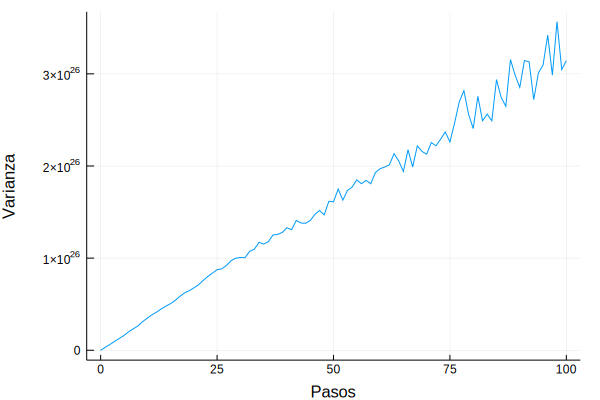

In [21]:
F_0 = 10^12
caminantes = 1000
pasos = 100
Coleccion = []
tiempo = []
for i in 1:caminantes
    B = []
    d = Normal(0,1)

    K(x,t) = a.*rand(d) #Esta es mi función sqrt(2k_{B}T(Δt)/γ)W(t) -F_{0}∇|x|, 
                        #donde W(t) es un proceso de Wiener que podemos simular con valores de una distribución normal
    B = metodo_Euler_Langevin(K,0,2,r,pasos)
    push!(Coleccion, B[1])
    push!(tiempo, B[2])
end

C = Coleccion
D = tiempo
plot(D[:], C[:], lc = :black,leg = false, lw = 0.1, xlabel = "Tiempo", ylabel = "Distancia recorrida", show = :ijulia)

cuadrado = []
for l in 1:caminantes
    push!(cuadrado,(C[l]) .^ 2)
end
#⟨x^2⟩
promedio_de_cuadrado = sum(cuadrado[:]) / length(tiempo)
#⟨x⟩
promedio_posicion = sum(C[:]) / length(tiempo)
#⟨x⟩^2

cuadrado_de_promedio = promedio_posicion .^ 2

#Var(x) = ⟨x^2⟩ - ⟨x⟩^2
varianza = promedio_de_cuadrado .- cuadrado_de_promedio
plot(0:pasos, varianza,    leg = false, xlabel = "Pasos", ylabel = "Varianza")

Vemos que se mantiene estable la pendiente a simple vista sin la necesidad de calcular el coeficiente. Sin embargo, hasta $F_0 = 10^12$ aún se mantiene con una pendiente constante, pero a partir de este punto ya se vulve inestable, veamos en $10^{13}$

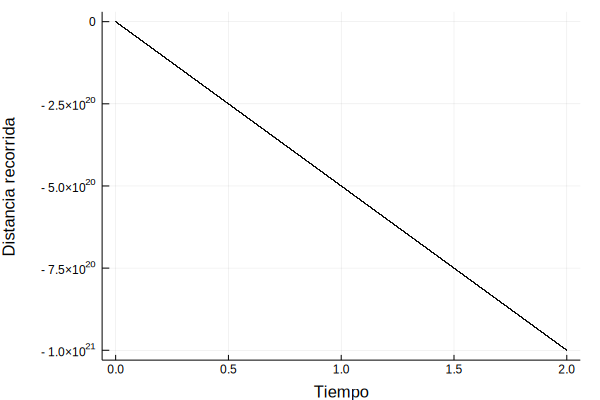

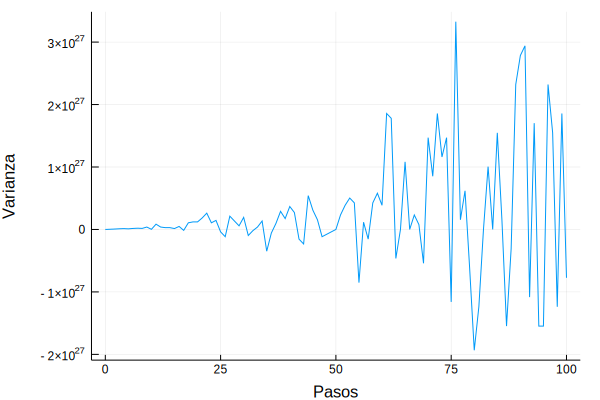

In [22]:
F_0 = 10^13
caminantes = 1000
pasos = 100
Coleccion = []
tiempo = []
for i in 1:caminantes
    B = []
    d = Normal(0,1)

    K(x,t) = a.*rand(d) #Esta es mi función sqrt(2k_{B}T(Δt)/γ)W(t) -F_{0}∇|x|, 
                        #donde W(t) es un proceso de Wiener que podemos simular con valores de una distribución normal
    B = metodo_Euler_Langevin(K,0,2,r,pasos)
    push!(Coleccion, B[1])
    push!(tiempo, B[2])
end

C = Coleccion
D = tiempo
plot(D[:], C[:], lc = :black,leg = false, lw = 0.1, xlabel = "Tiempo", ylabel = "Distancia recorrida", show = :ijulia)

cuadrado = []
for l in 1:caminantes
    push!(cuadrado,(C[l]) .^ 2)
end
#⟨x^2⟩
promedio_de_cuadrado = sum(cuadrado[:]) / length(tiempo)
#⟨x⟩
promedio_posicion = sum(C[:]) / length(tiempo)
#⟨x⟩^2

cuadrado_de_promedio = promedio_posicion .^ 2

#Var(x) = ⟨x^2⟩ - ⟨x⟩^2
varianza = promedio_de_cuadrado .- cuadrado_de_promedio
plot(0:pasos, varianza,    leg = false, xlabel = "Pasos", ylabel = "Varianza")